In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_csv('housing.csv')

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data.shape

(20640, 10)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
data.dropna(inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [18]:
print(X)
print(Y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2484,-120.38,36.15,17.0,2279.0,448.0,1200.0,420.0,2.7461,INLAND,70000.0
1109,-121.60,39.83,12.0,3744.0,699.0,1532.0,660.0,2.3079,INLAND,95300.0
6794,-118.14,34.09,38.0,1745.0,457.0,1547.0,460.0,2.8500,<1H OCEAN,219000.0
18100,-122.04,37.31,29.0,2476.0,434.0,1217.0,416.0,6.2045,<1H OCEAN,393800.0
11167,-117.99,33.83,35.0,1484.0,252.0,916.0,248.0,5.2657,<1H OCEAN,191400.0
...,...,...,...,...,...,...,...,...,...,...
16487,-121.09,38.19,23.0,762.0,140.0,358.0,141.0,2.4545,INLAND,105000.0
1250,-122.05,39.34,44.0,1064.0,230.0,494.0,175.0,2.8750,INLAND,61500.0
1089,-121.82,39.73,33.0,2242.0,517.0,1160.0,449.0,1.7426,INLAND,60300.0
19933,-119.32,36.30,15.0,2864.0,571.0,1480.0,475.0,2.9698,INLAND,93400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

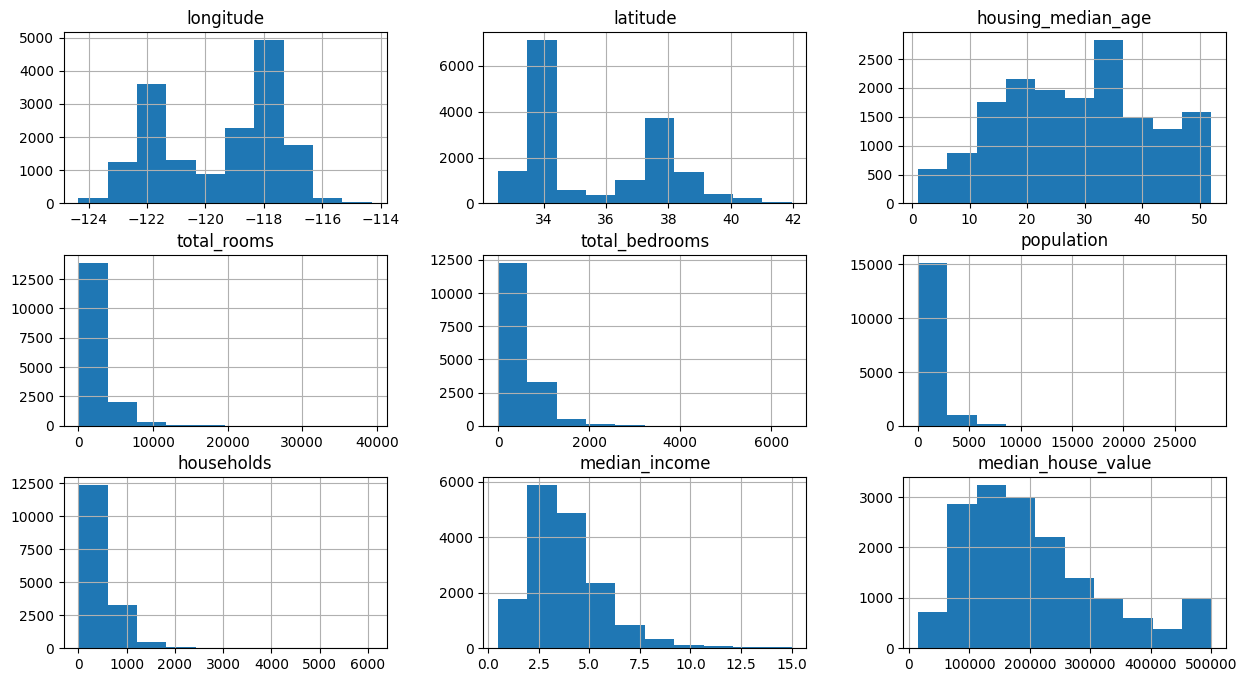

In [21]:
train_data.hist(figsize=(15,8))

In [22]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

In [23]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

<Axes: >

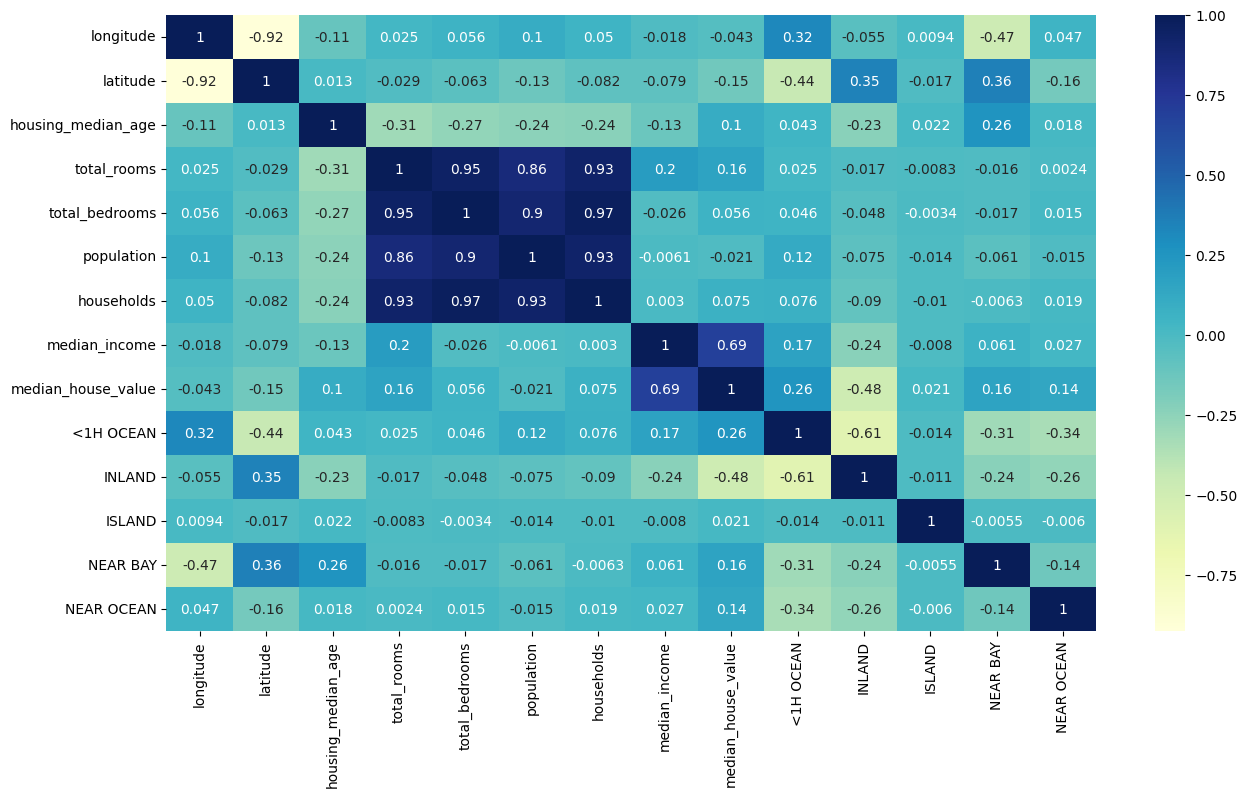

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

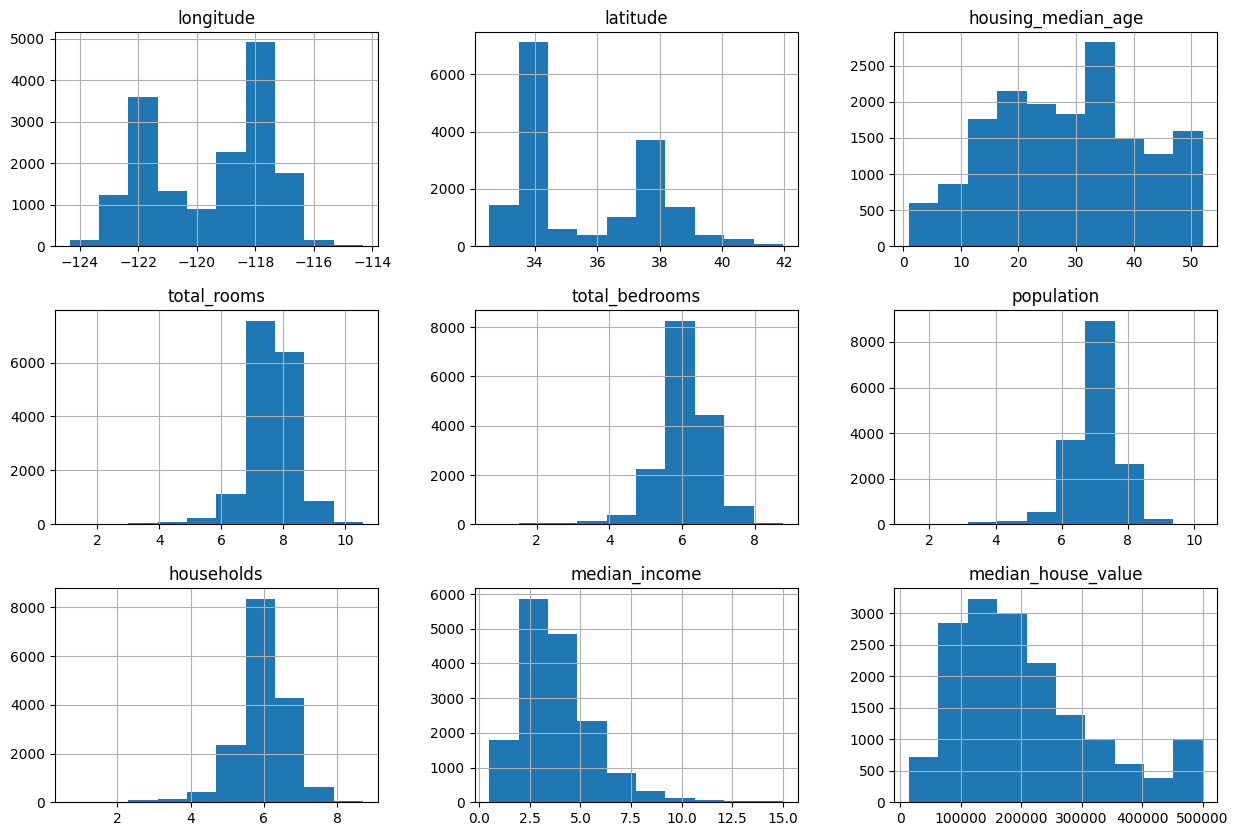

In [25]:
train_data.hist(figsize=(15,10))

<Axes: xlabel='latitude', ylabel='longitude'>

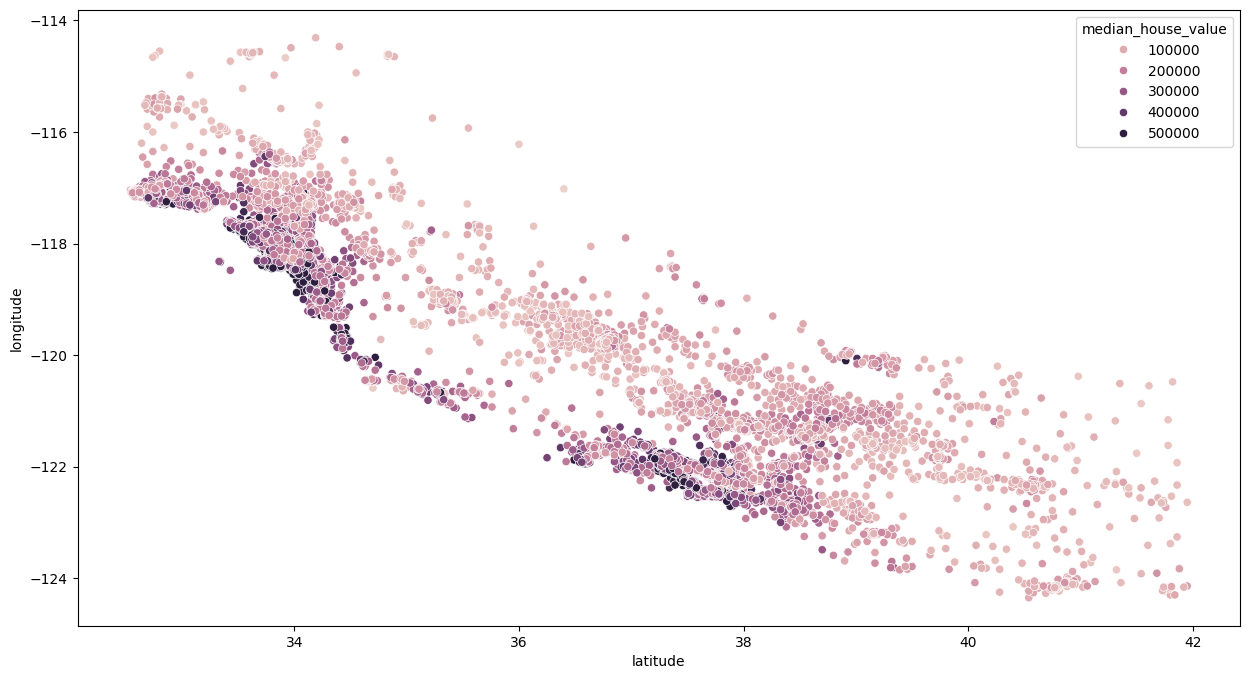

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value')

In [27]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

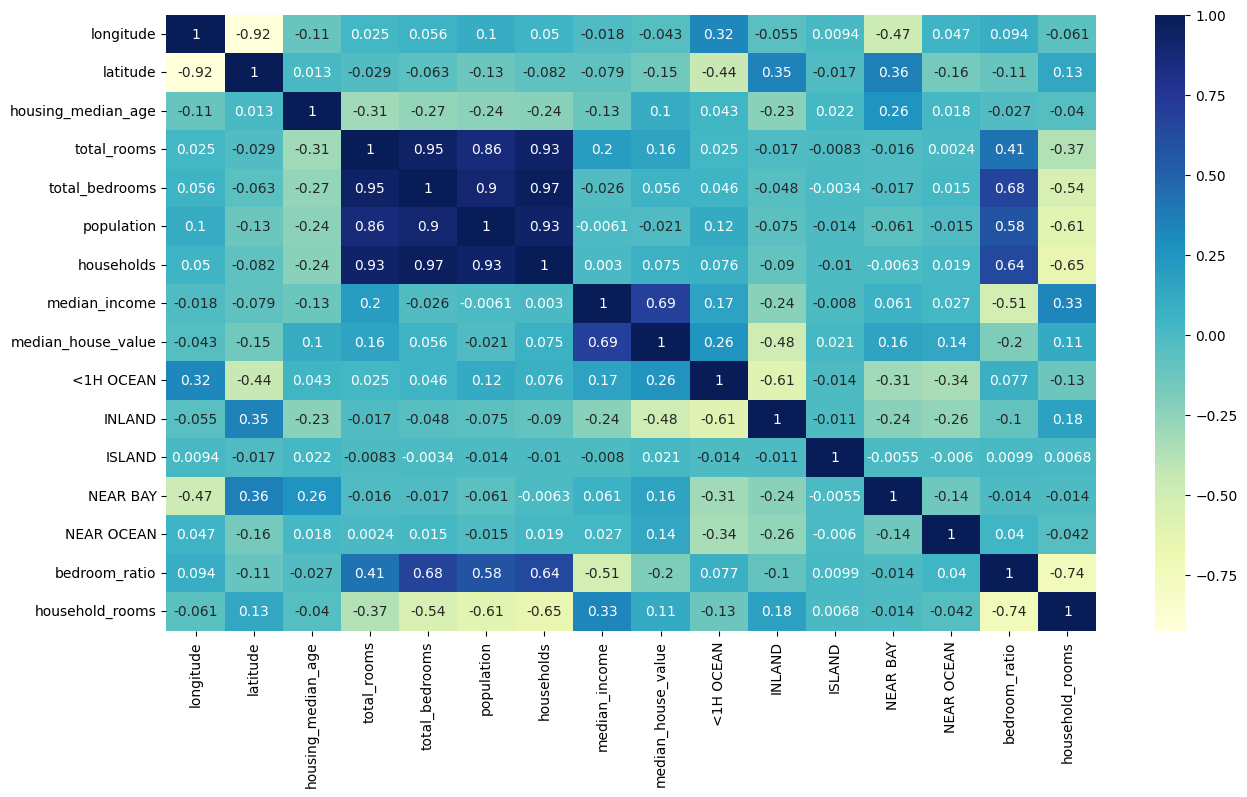

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [29]:
X_train , Y_train = train_data.drop(['median_house_value'], axis=1) , train_data['median_house_value']

In [30]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [31]:
reg.score(X_train , Y_train)

0.6722007322944159

In [32]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [33]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16498,-120.97,37.84,28.0,7.770223,6.066108,7.116394,6.001415,2.8830,141900.0,False,True,False,False,False,0.780686,1.294732
7130,-118.11,34.02,17.0,9.165343,7.555905,8.571681,7.520235,5.1515,318900.0,True,False,False,False,False,0.824400,1.218758
9132,-118.01,34.55,2.0,7.901748,6.274762,7.221836,6.066108,4.0710,137400.0,False,True,False,False,False,0.794098,1.302606
8817,-118.32,33.74,24.0,8.715716,6.678342,7.718241,6.693324,10.1357,500001.0,False,False,False,False,True,0.766241,1.302151
13660,-117.32,34.02,17.0,7.484369,5.680173,6.914731,5.683580,4.6708,123100.0,False,True,False,False,False,0.758938,1.316841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,-117.14,33.15,16.0,7.029973,5.293305,6.632002,5.187386,5.0346,174600.0,True,False,False,False,False,0.752962,1.355205
6419,-118.01,34.15,32.0,8.794522,7.365180,8.213382,7.286192,3.2377,184100.0,False,True,False,False,False,0.837474,1.207012
7808,-118.10,33.89,34.0,7.715570,6.079933,7.302496,6.095825,4.4934,185600.0,True,False,False,False,False,0.788008,1.265714
13889,-116.57,35.43,8.0,9.207937,7.463937,8.829958,7.272398,2.7138,22500.0,False,True,False,False,False,0.810598,1.266149


In [34]:
X_test , Y_test = test_data.drop(['median_house_value'], axis=1) , test_data['median_house_value']

In [35]:
reg.score(X_test , Y_test)

0.6664478914891862

In [36]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
reg.fit(X_train_s , Y_train)

LinearRegression()

In [37]:
reg.score(X_train_s , Y_train)

0.6722007322944159

In [38]:
X_test_s = scaler.transform(X_test)
reg.score(X_test_s , Y_test)

0.666447891489186